# Notebook zu Blatt 8

In [17]:
%pip install numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [19]:
def selectionSort(array): 
    size = len(array)
    for step in range(size):
        min_idx = step # Minimum

        for i in range(step + 1, size):
         
            # wähle Minimum aus
            if array[i] < array[min_idx]:
                min_idx = i
         
        # die beiden Array Elemente tauschen
        (array[step], array[min_idx]) = (array[min_idx], array[step])


In [20]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [21]:
def quickSort(array):
    # Wir rufen unsere Rekursive Funktion mit dem Start Array auf
    quickSortRecursive(array, 0, len(array)-1)

# Funktion, welche die Position des neuen Pivot/Splitter Elements bestimmt
def partition(array, low, high):

    # Wir nehmen das "rechteste" Element
    pivot = array[high]

    # pointer for greater element
    i = low - 1

    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:

            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1

            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1


# function to perform quicksort
def quickSortRecursive(array, low, high):
    if low < high:

        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)

        # Recursive call on the left of pivot
        quickSortRecursive(array, low, pi - 1)

        # Recursive call on the right of pivot
        quickSortRecursive(array, pi + 1, high)
    
    


In [22]:
array = [7,5,8,1] 
quickSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [23]:
# Hier kommen die Testfälle!
arrays = [[1,2,3,4,5],[9,8,7,6,5,4,3,2,1],[90,2,300,-3,30000,5,555,824, 0, 8],[2,4,8,16,32,64,128,256,1,-5,-2,-3,-400],[10,-10,20,-20,30,-30,40,-40,50,-50],[]]
arrays2 = [[1,2,3,4,5],[9,8,7,6,5,4,3,2,1],[90,2,300,-3,30000,5,555,824, 0, 8],[2,4,8,16,32,64,128,256,1,-5,-2,-3,-400],[10,-10,20,-20,30,-30,40,-40,50,-50],[]]

for i in range(1,6):
    quickSort(arrays[i])
    selectionSort(arrays2[i])
    
print(arrays)
print(arrays2)

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8, 9], [-3, 0, 2, 5, 8, 90, 300, 555, 824, 30000], [-400, -5, -3, -2, 1, 2, 4, 8, 16, 32, 64, 128, 256], [-50, -40, -30, -20, -10, 10, 20, 30, 40, 50], []]
[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8, 9], [-3, 0, 2, 5, 8, 90, 300, 555, 824, 30000], [-400, -5, -3, -2, 1, 2, 4, 8, 16, 32, 64, 128, 256], [-50, -40, -30, -20, -10, 10, 20, 30, 40, 50], []]


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [24]:
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    selectionSort(array)
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden
    
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    quickSort(array)
    end = time.time()
    q_times.append(end-start) # die zeit in sekunden

    # und dann jetzt noch für quicksort :)
print("Selection Sort benötigte für die verschiedenen Array Größen folgende Zeiten:")
print(s_times)
print()
print("Quick Sort benötigte für die verschiedenen Array Größen folgende Zeiten:")
print(q_times)

Selection Sort benötigte für die verschiedenen Array Größen folgende Zeiten:
[4.506111145019531e-05, 0.0006270408630371094, 0.015025854110717773, 0.05873894691467285, 0.12861967086791992, 0.2368178367614746, 0.3706941604614258, 0.5359890460968018, 1.4871201515197754, 3.359060049057007, 5.980295896530151]

Quick Sort benötigte für die verschiedenen Array Größen folgende Zeiten:
[1.0967254638671875e-05, 0.00016117095947265625, 0.0009608268737792969, 0.002074003219604492, 0.004046916961669922, 0.004739046096801758, 0.006757020950317383, 0.007353067398071289, 0.013450860977172852, 0.020529985427856445, 0.029748201370239258]


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

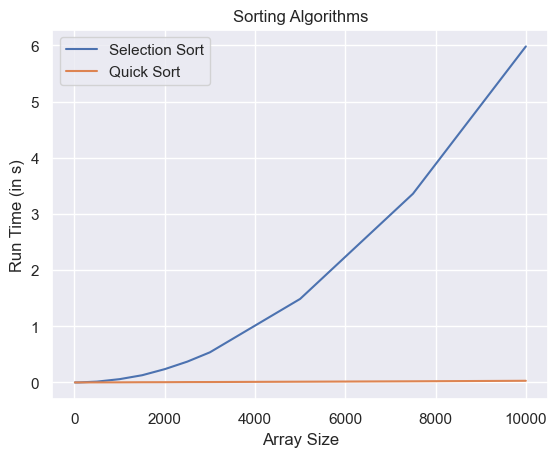

In [25]:
# Hier kommet der Plot!
from matplotlib import pyplot as plt 
sns.set()
fig = plt.figure()

plt.title("Sorting Algorithms")
plt.xlabel("Array Size")
plt.ylabel("Run Time (in s)")



plt.plot(arrar_sizes,s_times, label="Selection Sort")
plt.plot(arrar_sizes,q_times, label = "Quick Sort")
plt.legend()
plt.show()


#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

Konstante von Selection Sort:  5.980295896530151e-08
Konstante von Quick Sort:  3.229869925410416e-07


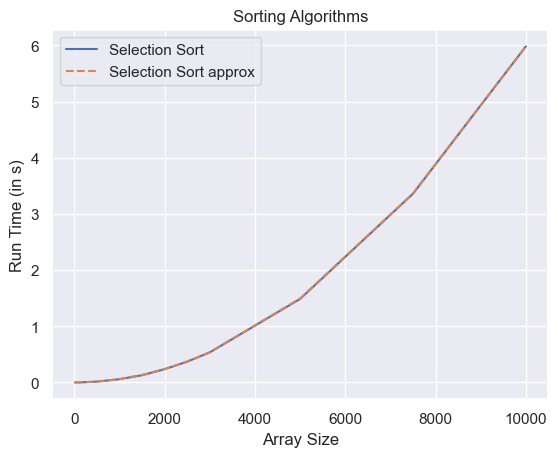

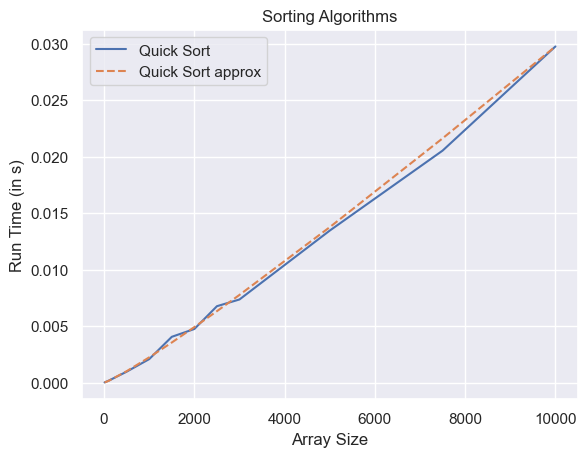

In [26]:
# Hier kommen die Plots!
selec_square = np.array(arrar_sizes) * arrar_sizes
quick_nlogn = np.array(arrar_sizes) * np.log(arrar_sizes)

C1: float =  s_times[-1] / selec_square[-1]
C2: float = q_times[-1] / quick_nlogn[-1] 

selec_asympt = selec_square * C1
quick_asympt = quick_nlogn * C2

print("Konstante von Selection Sort:  " + str(C1))
print("Konstante von Quick Sort:  " + str(C2))
plt.title("Sorting Algorithms")
plt.xlabel("Array Size")
plt.ylabel("Run Time (in s)")
plt.plot(arrar_sizes,s_times, label="Selection Sort")
plt.plot(arrar_sizes,selec_asympt,label="Selection Sort approx", linestyle= "dashed")
plt.legend()
plt.show()

plt.title("Sorting Algorithms")
plt.xlabel("Array Size")
plt.ylabel("Run Time (in s)")
plt.plot(arrar_sizes,q_times, label = "Quick Sort")
plt.plot(arrar_sizes,quick_asympt, label = "Quick Sort approx", linestyle= "dashed")
plt.legend()
plt.show()

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

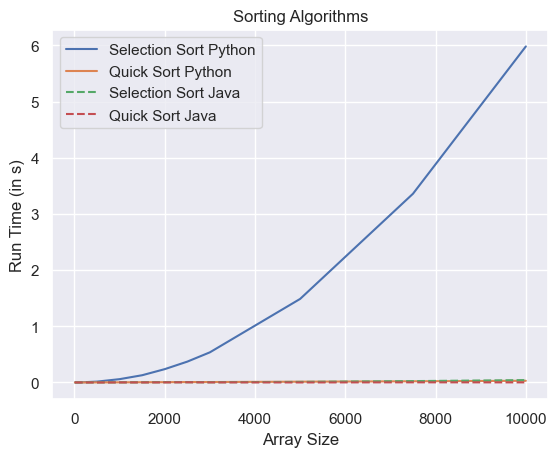

In [27]:
# Hier kommt eure Laufzeitanalyse!

selec_java = [0.0, 0.0, 0.002, 0.002, 0.002, 0.005, 0.004, 0.003, 0.01, 0.024, 0.042]
quick_java = [0.0, 0.0, 0.0, 0.001, 0.0, 0.001, 0.003, 0.001, 0.0, 0.002, 0.001]

plt.title("Sorting Algorithms")
plt.xlabel("Array Size")
plt.ylabel("Run Time (in s)")
plt.plot(arrar_sizes,s_times, label="Selection Sort Python")
plt.plot(arrar_sizes,q_times, label = "Quick Sort Python")
plt.plot(arrar_sizes,selec_java,label="Selection Sort Java", linestyle= "dashed")
plt.plot(arrar_sizes,quick_java, label = "Quick Sort Java", linestyle= "dashed")
plt.legend()
plt.show()

#### Aufgabe 9

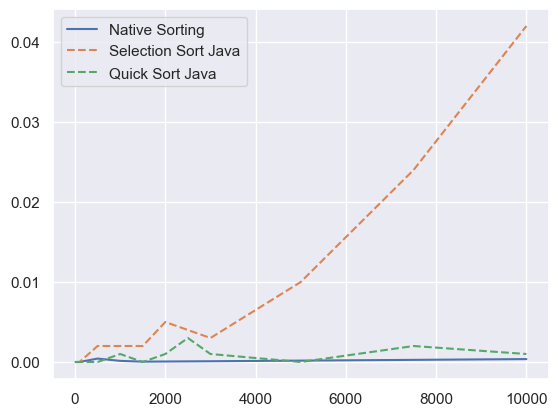

In [28]:
# Compute run times of native sorting algorithm
sort_native = []
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    array.sort()
    end = time.time()
    sort_native.append(end-start) # die zeit in sekunden
    

plt.plot(arrar_sizes,sort_native, label="Native Sorting")
plt.plot(arrar_sizes,selec_java,label="Selection Sort Java", linestyle= "dashed")
plt.plot(arrar_sizes,quick_java, label = "Quick Sort Java", linestyle= "dashed")
plt.legend()
plt.show()



#### Aufgabe 10

In [29]:
C_Java_Selec = selec_java[-1] / selec_square[-1]
C_Java_Quick = quick_java[-1] / quick_nlogn[-1]

print("Java: Constant for Selection Sort = " + str(C_Java_Selec)  + " --> Größenordnung: 10^-10")
print("Java: Constant for Quick Sort = " + str(C_Java_Quick) + " --> Größenordnung: 10^-8")  
print("Python: Constant for Selection Sort = " + str(C1)  + " --> Größenordnung: 10^-8")
print("Python: Constant for Quick Sort = " + str(C2) + " --> Größenordnung: 10^-7") 
print()
print("Verhältnis Java zu Python: Selec Sort: " + str(C1/C_Java_Selec) + "\n --> ca. 122 mal schneller in Java")
print()
print("Verhältnis Java zu Python: Quick Sort: " + str(C2/C_Java_Quick) + "\n --> ca. 27 mal schneller in Java")



Java: Constant for Selection Sort = 4.2000000000000005e-10 --> Größenordnung: 10^-10
Java: Constant for Quick Sort = 1.0857362047581295e-08 --> Größenordnung: 10^-8
Python: Constant for Selection Sort = 5.980295896530151e-08 --> Größenordnung: 10^-8
Python: Constant for Quick Sort = 3.229869925410416e-07 --> Größenordnung: 10^-7

Verhältnis Java zu Python: Selec Sort: 142.38799753643215
 --> ca. 122 mal schneller in Java

Verhältnis Java zu Python: Quick Sort: 29.748201370239258
 --> ca. 27 mal schneller in Java
